In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pywaffle import Waffle
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
df = pd.read_excel('Homework_raw_data (1).xlsx', sheet_name='Raw_Data')
df

,ROW,Basket_ID,Product category ID,# of items,REGION ID for shipping,Region Name,Purchase date,REVENUE,GROSS PROFIT
0,1,400157,116,1,3,Techton,2017-06-22,28.9,3.179
1,2,400157,118,1,3,Techton,2017-06-22,30.5,3.660
2,3,400189,116,1,3,Techton,2016-11-30,30.5,2.745
3,4,400189,118,1,3,Techton,2016-11-30,20.9,3.762
4,5,400251,113,1,3,Techton,2017-04-09,24.5,7.350
...,...,...,...,...,...,...,...,...,...
26626,26627,405556,113,1,1,Oldton,2016-11-08,17.9,6.981
26627,26628,405556,114,1,1,Oldton,2016-11-08,15.5,7.130
26628,26629,405556,115,1,1,Oldton,2016-11-08,20.5,5.125
26629,26630,405569,115,1,1,Oldton,2017-04-08,16.9,2.366


In [3]:
df.isnull().sum()

ROW                       0
Basket_ID                 0
Product category ID       0
# of items                0
REGION ID for shipping    0
Region Name               0
Purchase date             0
REVENUE                   0
GROSS PROFIT              0
dtype: int64

In [4]:
df[['REVENUE', 'GROSS PROFIT']].describe().round(2)

,REVENUE,GROSS PROFIT
count,26631.00,26631.00
mean,19.73,3.98
std,7.00,2.73
min,5.50,0.28
25%,14.50,2.02
50%,19.90,3.18
75%,25.70,5.18
max,30.90,15.45


In [5]:
df[['# of items', 'Product category ID', 'Region Name']].apply(lambda x: x.value_counts()).T.stack()

# of items           1           26390.0
                     2             122.0
                     3             119.0
Product category ID  112           765.0
                     113          3542.0
                     114          5162.0
                     115          2401.0
                     116          7685.0
                     117          1659.0
                     118          5090.0
                     119           327.0
Region Name          Honeyton    10255.0
                     Oldton       6242.0
                     Techton     10134.0
dtype: float64

In [26]:
names_tr = ["Necklaces & earrings", "Bracelets", "Scarves", "Men’s shoes & socks", "Women’s shoes & socks", "Soaps", "Moisturizers & balms", "Men’s care"]


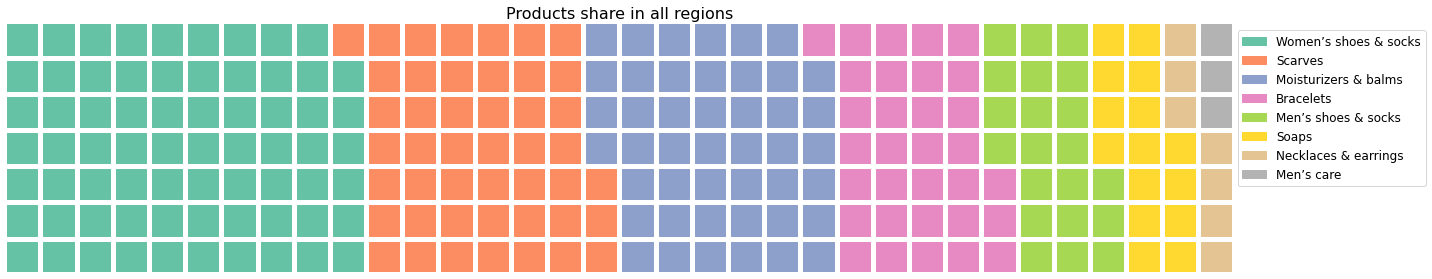

In [128]:
tr_labels = ["Women’s shoes & socks", "Scarves", "Moisturizers & balms", "Bracelets", "Men’s shoes & socks", "Soaps", "Necklaces & earrings", "Men’s care"]

# ----------------------------------------------------------------------------------------------------

values = {k:v for k,v in zip(df["Product category ID"].value_counts().index, df["Product category ID"].value_counts().values)}

# ----------------------------------------------------------------------------------------------------

plt.figure(
    FigureClass = Waffle,
    rows = 7,
    columns = 34,
    values = values,
    legend = {'labels' : tr_labels, 'loc': 'upper left', 'bbox_to_anchor': (1, 1), "fontsize": "12"},
    figsize = (20, 7)
)

# ----------------------------------------------------------------------------------------------------
# set a title
plt.title("Products share in all regions", fontsize = 16);
plt.savefig("waf.png")

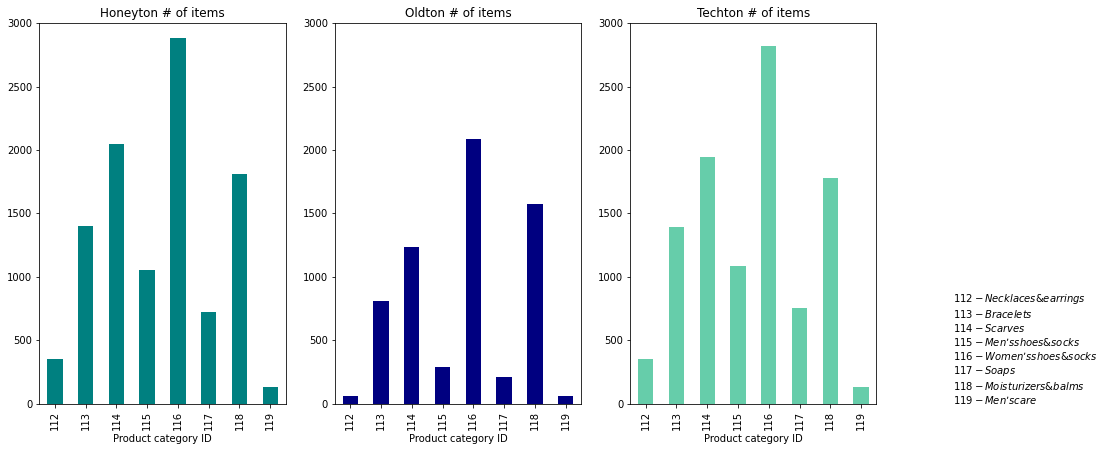

In [141]:

plt.rcParams["figure.figsize"] = (15,7)

plt.subplot(131)
ax1 = df[df['Region Name'] == 'Honeyton'].groupby('Product category ID')['# of items'].sum().plot(kind='bar', color = "teal")
ax1.set_title("Honeyton # of items")
ax1.set_ylim([0, 3000])

plt.subplot(132)

ax1 = df[df['Region Name'] == 'Oldton'].groupby('Product category ID')['# of items'].sum().plot(kind='bar', color = 'navy')
ax1.set_title("Oldton # of items")
ax1.set_ylim([0, 3000])

plt.subplot(133)
ax1 = df[df['Region Name'] == 'Techton'].groupby('Product category ID')['# of items'].sum().plot(kind='bar', color = "mediumaquamarine")
ax1.set_title("Techton # of items")
ax1.set_ylim([0, 3000])
labels_eil = ["112 - Necklaces & earrings", "113 - Bracelets", "114 - Scarves", "115 - Men’s shoes & socks", "116 - Women’s shoes & socks", "117 - Soaps", "118 - Moisturizers & balms", "119 - Men’s care"]

textstr = '\n'.join((
    r'$112 - Necklaces & earrings$',
    r'$113 - Bracelets$',
    r'$114 - Scarves$',
    r'$115 - Men’s shoes & socks$',
    r'$116 - Women’s shoes & socks$',
    r'$117 - Soaps$',
    r'$118 - Moisturizers & balms$',
    r'$119 - Men’s care$',
))



plt.text(10, 0, textstr, fontsize=10)


#plt.show()
plt.savefig("it.png")

In [172]:
h = df[df['Region Name'] == 'Honeyton'].groupby('Product category ID')['# of items'].sum()
o = df[df['Region Name'] == 'Oldton'].groupby('Product category ID')['# of items'].sum()
t = df[df['Region Name'] == 'Techton'].groupby('Product category ID')['# of items'].sum()
df1 = pd.merge(h, o, on="Product category ID", how="left")
df_ton = pd.merge(df1, t, on="Product category ID", how="left")

In [193]:
df_ton = df_ton.rename(columns={"# of items_x":"Honeyton", "# of items_y":"Oldton", "# of items":"Techton"})
df_ton = df_ton.rename(index={
    112: 'Necklaces & earrings',
    113: 'Bracelets',
    114: 'Scarves',
    115: 'Men’s shoes & socks',
    116: 'Women’s shoes & socks',
    117: 'Soaps',
    118: 'Moisturizers & balms',
    119: 'Men’s care'})


<Figure size 1080x504 with 0 Axes>

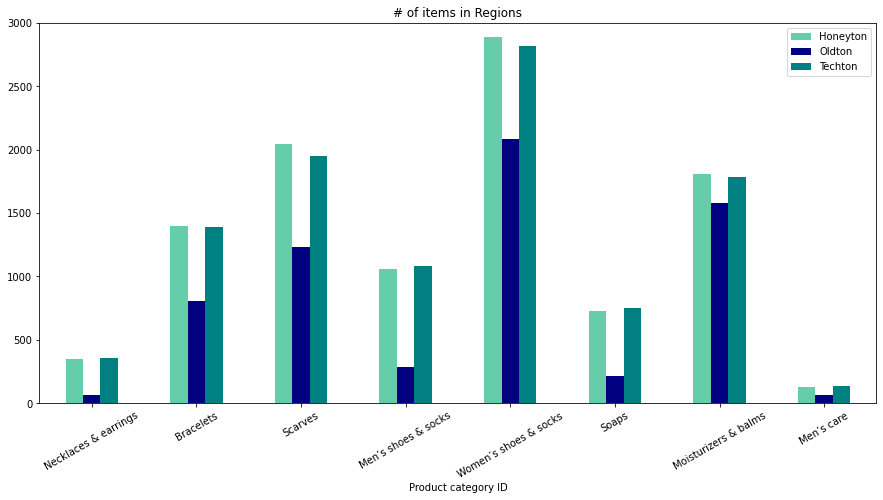

In [195]:
plt.rcParams["figure.figsize"] = (15,7)

ax1 = df_ton.plot(kind='bar', color = {"teal", "navy", "mediumaquamarine"})
ax1.set_title("# of items in Regions")
ax1.set_ylim([0, 3000])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30 )
plt.savefig("ttt.png")

In [102]:
tec_rev = df[df['Region Name'] == 'Techton'].groupby('Product category ID')['REVENUE'].sum()
tec_prof = df[df['Region Name'] == 'Techton'].groupby('Product category ID')['GROSS PROFIT'].sum()
old_rev = df[df['Region Name'] == 'Oldton'].groupby('Product category ID')['REVENUE'].sum()
old_prof = df[df['Region Name'] == 'Oldton'].groupby('Product category ID')['GROSS PROFIT'].sum()
honey_rev = df[df['Region Name'] == 'Honeyton'].groupby('Product category ID')['REVENUE'].sum()
honey_prof = df[df['Region Name'] == 'Honeyton'].groupby('Product category ID')['GROSS PROFIT'].sum()
names = ["Necklaces & earrings", "Bracelets", "Scarves", "Men’s shoes & socks", "Women’s shoes & socks", "Soaps", "Moisturizers & balms", "Men’s care"]

In [103]:
names_tr = ["Necklaces & earrings", "Bracelets", "Scarves", "Men’s shoes & socks", "Women’s shoes & socks", "Soaps", "Moisturizers & balms", "Men’s care"]
df_ton_rev_prof = pd.DataFrame([names, tec_rev, tec_prof, old_rev, old_prof, honey_rev, honey_prof], ["names", "tec_rev", "tec_prof", "old_rev", "old_prof", "honey_rev", "honey_prof"]).T
df_ton_rev_prof.sort_values("tec_rev", ascending = True, inplace = True)

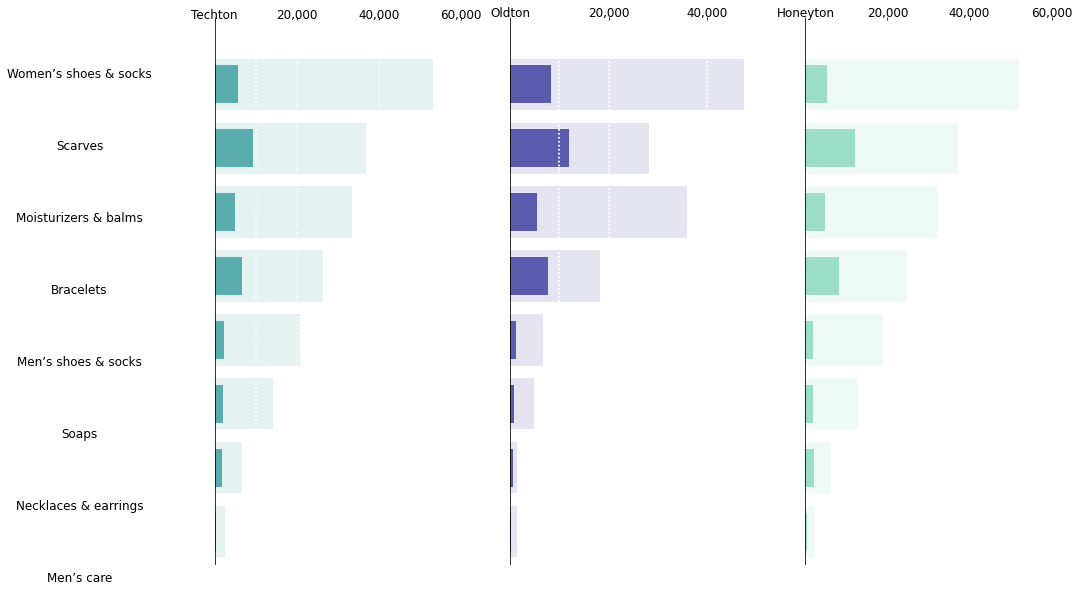

In [127]:
# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (15, 10))
axes = fig.subplots(1, 3)

# ----------------------------------------------------------------------------------------------------
# plot the data

ax1 = axes[0]
ax1.set_ylim(-0.5, len(names_tr))
ax1_bis = ax1.twiny()
# plot a bar chart with the greater values
ax1_bis.barh(y = df_ton_rev_prof["names"], 
         width = df_ton_rev_prof["tec_rev"],
         color = "teal", 
         alpha = .1)

# plot a bar chart with the smaller values
# make the height a little smaller to fit inside the bigger one
ax1_bis.barh(y = df_ton_rev_prof["names"], 
         width = df_ton_rev_prof["tec_prof"],
         height = 0.6,
         color = "teal", 
         alpha = 0.6)

# manipulate the spines of the plot to make it a little nicer
ax1.spines["top"].set_color("None")
ax1.spines["bottom"].set_color("None")
ax1.spines["left"].set_color("None")
ax1.spines["right"].set_color("None")

# manipulate the spines of the plot to make it a little nicer
ax1_bis.spines["top"].set_color("None")
ax1_bis.spines["bottom"].set_color("None")
ax1_bis.spines["left"].set_color("black")
ax1_bis.spines["right"].set_color("None")

# add vertical lines
ax1_bis.vlines(10_000, 0, len(names), color = "white", linestyle = "dotted")
ax1_bis.vlines(20_000, 0, len(names), color = "white", linestyle = "dotted")
ax1_bis.vlines(40_000, 0, len(names), color = "white", linestyle = "dotted")

# set for the main plot the x and y labels to none
ax1.set_yticks([])
ax1.set_xticks([])

# change the x ticks labels for the twinx acess
x_ticks = ax1_bis.get_xticks()
x_ticks[::2]
x_ticks_labels = ["Techton", "20,000", "40,000", "60,000"]

# change the x ticks with our new x ticks labels
ax1_bis.set_xticks(x_ticks[::2])
ax1_bis.set_xticklabels(x_ticks_labels, fontdict = {'horizontalalignment': 'center', 'verticalalignment': 'center_baseline', "fontsize":"12"})

# ----------------------------------------------------------------------------------------------------

# access the plot
ax2 = axes[1]
# change the x and y limit
ax2.set_ylim(-.5, len(names_tr))
# create a secondary axis
ax2_bis = ax2.twiny()

# plot a bar chart with the greater values
ax2_bis.barh(y = df_ton_rev_prof["names"], 
         width = df_ton_rev_prof["old_rev"],
         color = "navy", 
         alpha = .1)

# plot a bar chart with the smaller values
# make the height a little smaller to fit inside the bigger one
ax2_bis.barh(y = df_ton_rev_prof["names"], 
         width = df_ton_rev_prof["old_prof"],
         height = 0.6,
         color = "navy", 
         alpha = 0.6)

# manipulate the spines of the plot to make it a little nicer
ax2.spines["top"].set_color("None")
ax2.spines["bottom"].set_color("None")
ax2.spines["left"].set_color("None")
ax2.spines["right"].set_color("None")

# manipulate the spines of the plot to make it a little nicer
ax2_bis.spines["top"].set_color("None")
ax2_bis.spines["bottom"].set_color("None")
ax2_bis.spines["left"].set_color("black")
ax2_bis.spines["right"].set_color("None")

# add vertical lines
ax2_bis.vlines(10_000, 0, len(names), color = "white", linestyle = "dotted")
ax2_bis.vlines(20_000, 0, len(names), color = "white", linestyle = "dotted")
ax2_bis.vlines(40_000, 0, len(names), color = "white", linestyle = "dotted")

# change the x ticks labels for the twinx acess
x_ticks = ax2_bis.get_xticks()
x_ticks[::2]
x_ticks_labels = ["Oldton", "20,000", "40,000", "60,000"]

# change the x ticks with our new x ticks labels
ax2_bis.set_xticks(x_ticks[::2])
ax2_bis.set_xticklabels(x_ticks_labels, fontdict = {'horizontalalignment': 'center', 'verticalalignment': 'center', "fontsize":"12"})

# change the x and y lables
ax2.set_xticks([])
ax2.set_yticks([])

# access the plot
ax3 = axes[2]

# change the x and y limit
ax3.set_ylim(-.5, len(names_tr))

# create a secondary axis
ax3_bis = ax3.twiny()

# plot a bar chart with the greater values
ax3_bis.barh(y = df_ton_rev_prof["names"], 
         width = df_ton_rev_prof["honey_rev"],
         color = "mediumaquamarine", 
         alpha = .1)

# plot a bar chart with the smaller values
# make the height a little smaller to fit inside the bigger one
ax3_bis.barh(y = df_ton_rev_prof["names"], 
         width = df_ton_rev_prof["honey_prof"],
         height = 0.6,
         color = "mediumaquamarine", 
         alpha = 0.6)

# manipulate the spines of the plot to make it a little nicer
ax3.spines["top"].set_color("None")
ax3.spines["bottom"].set_color("None")
ax3.spines["left"].set_color("None")
ax3.spines["right"].set_color("None")

# manipulate the spines of the plot to make it a little nicer
ax3_bis.spines["top"].set_color("None")
ax3_bis.spines["bottom"].set_color("None")
ax3_bis.spines["left"].set_color("black")
ax3_bis.spines["right"].set_color("None")

# add vertical lines
ax2_bis.vlines(10_000, 0, len(names), color = "white", linestyle = "dotted")
ax2_bis.vlines(20_000, 0, len(names), color = "white", linestyle = "dotted")
ax2_bis.vlines(40_000, 0, len(names), color = "white", linestyle = "dotted")

# change the x ticks labels for the twinx acess
x_ticks = ax3_bis.get_xticks()
x_ticks[::2]
x_ticks_labels = ["Honeyton", "20,000", "40,000", "60,000"]

# change the x ticks with our new x ticks labels
ax3_bis.set_xticks(x_ticks[::2])
ax3_bis.set_xticklabels(x_ticks_labels, fontdict = {'horizontalalignment': 'center', 'verticalalignment': 'center', "fontsize":"12"})

# change the x and y lables
ax3.set_xticks([])
ax3.set_yticks([])

for y_, naaa in zip([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], df_ton_rev_prof["names"].values):
    plt.text(0, y_, naaa, transform=fig.transFigure, fontsize=12,horizontalalignment='center')

#plt.tight_layout();
plt.savefig('s.png')

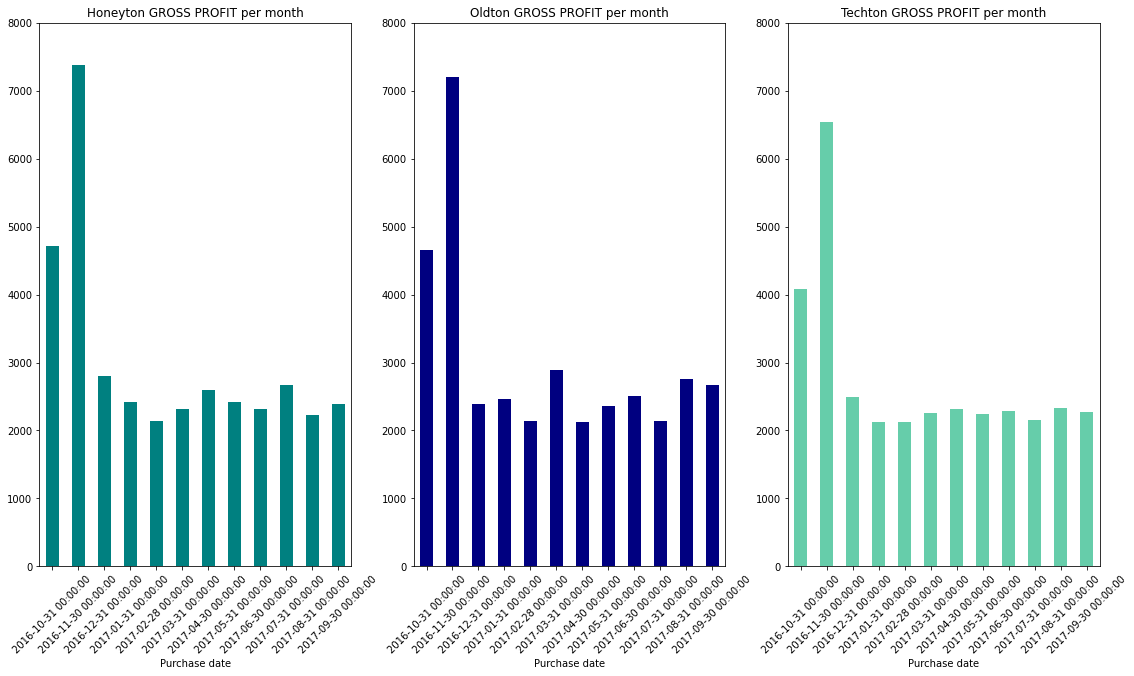

In [157]:
plt.rcParams["figure.figsize"] = (15,7)

plt.subplot(131)
ax1 = df[df['Region Name'] == 'Honeyton'].groupby([pd.Grouper(key='Purchase date', freq='1M')])['GROSS PROFIT'].sum().plot(kind='bar',
                                                                                figsize=(19, 10),
                                                                                 color='teal',
                                                                              rot=45)
ax1.set_title("Honeyton GROSS PROFIT per month")
ax1.set_ylim([0, 8000])


plt.subplot(132)
ax1 = df[df['Region Name'] == 'Oldton'].groupby([pd.Grouper(key='Purchase date', freq='1M')])['GROSS PROFIT'].sum().plot(kind='bar',
                                                                                figsize=(19, 10),
                                                                                 color='navy',
                                                                                rot=45)
ax1.set_title("Oldton GROSS PROFIT per month")
ax1.set_ylim([0, 8000])

plt.subplot(133)
ax1 = df[df['Region Name'] == 'Techton'].groupby([pd.Grouper(key='Purchase date', freq='1M')])['GROSS PROFIT'].sum().plot(kind='bar',
                                                                                figsize=(19, 10),
                                                                                 color='mediumaquamarine',
                                                                                rot=45)
ax1.set_title("Techton GROSS PROFIT per month")
ax1.set_ylim([0, 8000])


#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) 

plt.savefig('mon.png')

In [213]:
tec_rev = df[df['Region Name'] == 'Techton'].groupby('Product category ID')['REVENUE'].sum()
tec_prof = df[df['Region Name'] == 'Techton'].groupby('Product category ID')['GROSS PROFIT'].sum()
old_rev = df[df['Region Name'] == 'Oldton'].groupby('Product category ID')['REVENUE'].sum()
old_prof = df[df['Region Name'] == 'Oldton'].groupby('Product category ID')['GROSS PROFIT'].sum()
honey_rev = df[df['Region Name'] == 'Honeyton'].groupby('Product category ID')['REVENUE'].sum()
honey_prof = df[df['Region Name'] == 'Honeyton'].groupby('Product category ID')['GROSS PROFIT'].sum()
tec_it = df[df['Region Name'] == 'Techton'].groupby('Product category ID')['# of items'].sum()
old_it = df[df['Region Name'] == 'Oldton'].groupby('Product category ID')['# of items'].sum()
hon_it = df[df['Region Name'] == 'Honeyton'].groupby('Product category ID')['# of items'].sum()


df_all = pd.DataFrame([names, tec_it, tec_rev, tec_prof, old_it, old_rev, old_prof, hon_it, honey_rev, honey_prof], ["names", "tec_it", "tec_rev", "tec_prof", "old_it", "old_rev", "old_prof", "honey_it", "honey_rev", "honey_prof"]).T


In [236]:
d_it = d[['tec_it', 'old_it', 'honey_it']].to_dict()
d_rev = d[['tec_rev', 'old_rev', 'honey_rev']].to_dict()
d_prof = d[['tec_prof', 'old_prof', 'honey_prof']].to_dict()

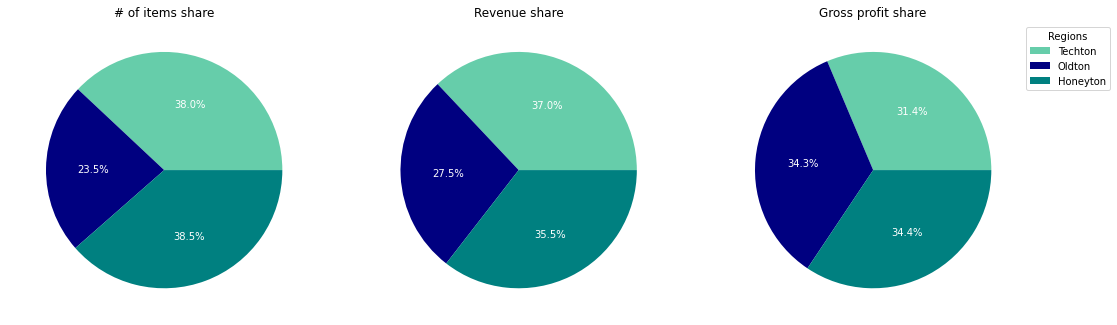

In [242]:
d = df_all.sum()

fig = plt.figure(figsize = (18, 6))


ax = fig.add_subplot(131)

ax.pie(d_it.values(), 
       labels = d_it.keys(), 
       autopct = '%1.1f%%', 
       textprops = {'fontsize': 10, 'color' : "white"} , 
       colors = {"teal", "navy", "mediumaquamarine"}
      )
ax.set_title("# of items share")

ax = fig.add_subplot(132)

ax.pie(d_rev.values(), 
       labels = d_rev.keys(), 
       autopct = '%1.1f%%', 
       textprops = {'fontsize': 10, 'color' : "white"} , 
       colors = {"teal", "navy", "mediumaquamarine"}
      )
ax.set_title("Revenue share")

ax = fig.add_subplot(133)

ax.pie(d_prof.values(), 
       labels = d_prof.keys(), 
       autopct = '%1.1f%%', 
       textprops = {'fontsize': 10, 'color' : "white"} , 
       colors = {"teal", "navy", "mediumaquamarine"}
      )
ax.set_title("Gross profit share")


ax.legend(loc = "upper left", bbox_to_anchor = (1, 0, 0.5, 1), fontsize = 10, title = "Regions", labels = ['Techton', 'Oldton', 'Honeyton'])
plt.savefig('sh.png')